# For a single HBL tile, plot a year of Fmask

In [1]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

import sys
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/DataAccess/Utilities')
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Visualization/Utilities')
import PreProcess_Utils as pputil
import Viz_Utils as vutil

In [ ]:
from dask.distributed import LocalCluster
cluster = LocalCluster(n_workers = 10, threads_per_worker = 10, memory_limit = 0) # Refined through testing
client = cluster.get_client()
client # Can open in other window by clicking 'Dashboard' link below

# ID Tile and time of Interest

## Tile

In [2]:
id = 237

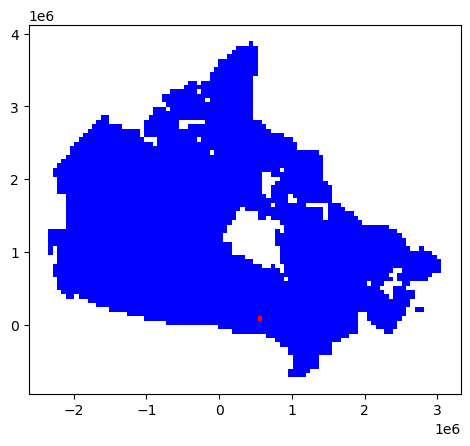

In [3]:
area_shp = r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\UtilityData\Study Areas\Canada\TileSystems\60km\canadaFishnet_CanVec_60km.shp"
area = gpd.read_file(area_shp, engine = 'pyogrio')
tile = area[area.index == id]
f, ax = plt.subplots()
area.plot(ax = ax, color = 'blue')
tile.plot(ax = ax, color = 'red')

plt.show()

## Annual

In [4]:
year = 2024

#nc = 'F:/HLS/Canada/Tiles60km/fmask/' + str(year) + '/fmask_' + str(id) + '_' + str(year) + '.nc'
nc = '//W-BSC-A151821/Snow_Dynamic_MB/fmask/' + str(year) + '/fmask_' + str(id) + '_' + str(year) + '.nc'

In [9]:
fmask = pputil.uploadNC(nc, form = 'dataarray', chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1}).squeeze()
print(len(fmask))

# # Combine same day, different sensor observations
# fmask = fmask.groupby('time').min(engine = 'flox', skipna = True)
# print(len(fmask))

# # Keep only time-steps that have 1%+ good values
# fmask = pputil.timestepClean(fmask, fmask.isin([1,2,3,4,5,6]), timestepClean = 'unclear', valid_status = 'static', invalid = 0, thresh = 99, verbose = False)
# print(len(fmask))

fmask

255


<xarray.DataArray 'stackstac-c67c51c72661bec572a620efd0fa3029' (time: 255,
                                                                y: 2001, x: 2001)> Size: 1GB
dask.array<getitem, shape=(255, 2001, 2001), dtype=uint8, chunksize=(1, 2001, 2001), chunktype=numpy.ndarray>
Coordinates:
    band           <U5 20B 'Fmask'
  * x              (x) float64 16kB 5.29e+05 5.29e+05 ... 5.889e+05 5.89e+05
  * y              (y) float64 16kB 1.153e+05 1.152e+05 ... 5.53e+04 5.528e+04
    constellation  (time) <U3 3kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time           (time) datetime64[ns] 2kB 2024-01-03 ... 2024-12-31
Attributes:
    spec:        RasterSpec(epsg=3979, bounds=(528960, 55260, 588990, 115290)...
    crs:         epsg:3979
    transform:   [ 3.0000e+01  0.0000e+00  5.2896e+05  0.0000e+00 -3.0000e+01...
    resolution:  30

In [10]:
fmask.nbytes

1021020255

In [ ]:
# import numpy as np
# np.unique(fmask.constellation.values, return_counts = True)

In [ ]:
#fmask[54, :, :].rio.to_raster('test.tif')

## Winter Year (2 years)

In [ ]:
# tile_stats = pd.read_csv(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\IMS (1 km)\Outputs\old\2024\tiles_IMS_SnowDynamics4HLS.csv", index_col = 0)
# tile_stats # Note, not every tile (snow free removed)

In [ ]:
# tile_stats.iloc[id]

In [ ]:
# implausible_snow = [int(tile_stats.loc[id, 'send_last']) + 7, int(tile_stats.loc[id, 'sstart_first']) - 7]
# implausible_snow 

In [ ]:
# doy = int(tile_stats.loc[id, 'smin_avg'])
# doy

In [ ]:
# w_s = 2019 # Year that winter ends
# w_e = 2020 # Year that winter starts

# path = 'F:/HLS/Canada/Tiles60km/fmask/'

In [ ]:
# %%time

# # Individual yearly cubes
# c_s = pputil.uploadNC(path + str(w_s) + '/fmask_' + str(id) + '_' + str(w_s) + '.nc', 
#                       form = 'dataarray',
#                       chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
# c_e = pputil.uploadNC(path + str(w_e) + '/fmask_' + str(id) + '_' + str(w_e) + '.nc', 
#                       form = 'dataarray',
#                       chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})

# # Combine same day, different sensor observations
# c_s = c_s.groupby('time').min(engine = 'flox', skipna = True).squeeze()
# c_e = c_e.groupby('time').min(engine = 'flox', skipna = True).squeeze()

# fmask = xr.concat((c_s, c_e), dim = 'time').sortby('time') 

# fmask = pputil.timestepClean(fmask, fmask.isin([1,2,3,4,5,6]), timestepClean = 'unclear', valid_status = 'static', invalid = 0, thresh = 99, 
#                              verbose = False)
# fmask

In [ ]:
#c_e.constellation.values

# Visualize Fmask time-series
- May take a couple minutes

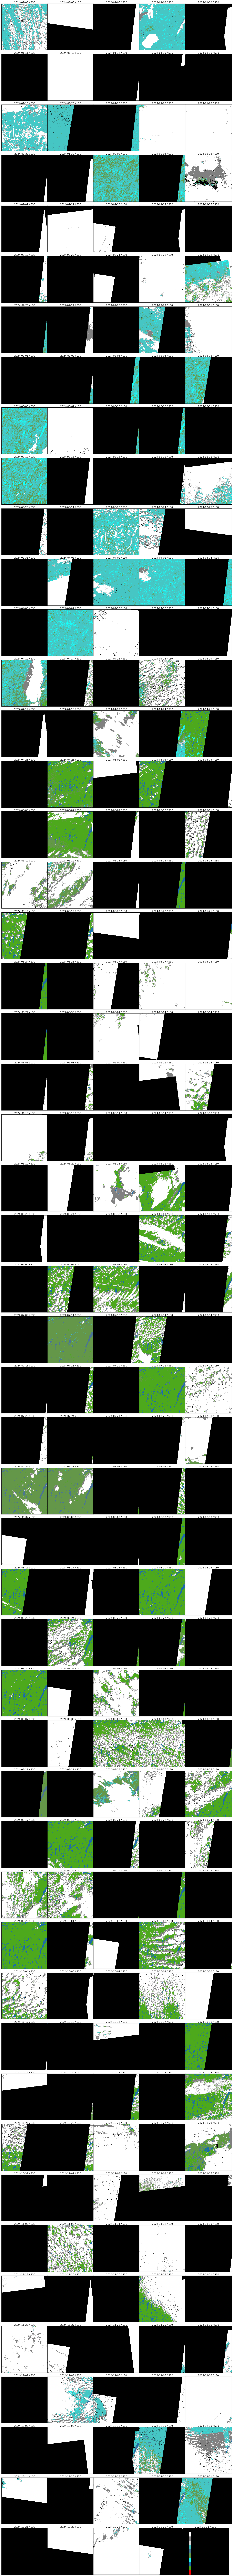

In [11]:
#vutil.matrixPlot(fmask, form = 'Fmask', sat = 'hls', byCon = False) # Full extent, all time-steps
vutil.matrixPlot(fmask, form = 'Fmask', sat = 'hls', byCon = True) # Full extent, all time-steps, no  same day, different sensor merging / time-step cleaning
#vutil.matrixPlot(fmask[40:53, :, :], form = 'Fmask', sat = 'hls', byCon = False)

#vutil.matrixPlot(fmask[100:, :, :], type = 'Fmask', sat = 'hls', byCon = False) # Just some timesteps
# Looking for May 5 to June 9 (40:53)
#vutil.matrixPlot(fmask[40:54, :, :], form = 'Fmask', sat = 'hls', byCon = False, save = 'Figure 4.tif') 

#vutil.matrixPlot(fmask[:, :, 511-60:511+60, 675-60:675+60], type = 'Fmask', sat = 'hls', byCon = False) # 10 x 10 around location of interest

In [ ]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# #cube1 = fmask.copy()

In [ ]:
# colors = ['#FF0000', '#4DA91C', '#1C6BA9', '#17FFFB', '#649749', '#497497', '#46c6c4', '#d3d3d3', '#808080', '#FFFFFF', '#000000']
# scale = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]

# cmap = mpl.colors.ListedColormap(colors)
# norm = mpl.colors.BoundaryNorm(scale, len(colors))

# plot = fmask[40:54, :, :].squeeze().plot.imshow(col = 'time', col_wrap = 5, size = 3.5 / 2.175, cmap = cmap, norm = norm, add_colorbar = False) # figsize = (6.5, 5)

# plt.tight_layout(h_pad = -0.75, w_pad = -14) # h_pad = 0.25, w_pad = -12.5

# cb = plt.colorbar(mpl.cm.ScalarMappable(norm = norm, cmap = cmap), ax = plot.axs[-1,-1], anchor = (-4.4, 0.5), ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# cb.ax.tick_params(size = 0, labelsize = 8)
# cb.ax.set_yticklabels(['Outside ROI', 'Land', 'Water', 'Snow', 'Land (High Aerosol)', 'Water (High Aerosol)', 'Snow (High Aerosol)', 'Cloud-adjacent', 'Shadow', 'Cloud', 'Fill'])

# for i, ax in enumerate(plot.axs.flat):
#     ax.set_yticks([]) # Remove y axis ticks
#     ax.set_xticks([]) # Remove x axis ticks
#     ax.set_ylabel('') # Remove y axis labels
#     ax.set_xlabel('') # Remove x axis labels
#     ax.set_aspect('equal') # Force square pixels
#     ax.set_title(ax.title.get_text()[7:], fontsize = 8, pad = 1) # Remotes 'time = ' 

# plt.show()

# plot.fig.get_figure().savefig('Figure 4_1.tif', dpi = 600, bbox_inches = 'tight', pil_kwargs = {'compression': 'tiff_lzw'})

In [ ]:
# for i, ax in enumerate(plot.axs.flat):
#     print(ax)

In [ ]:
# After lunch, apply this to Viz_Utils and make plot